In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, auc
import os 

In [2]:
# Load cleaned data
df = pd.read_csv("/Users/macintosh/Desktop/VS code/combined_data.csv")

In [3]:
df 

,unique_customer_identifier,cease_placed_date,cease_completed_date,reason_description,reason_description_insight,duration,Churn,avg_talk_time_seconds,talk_time_seconds_std,avg_hold_time_seconds,max_hold_time,std_hold_time,call_type,num_calls
0,03b1c584533a86d067dd51bbca242db2b55b692f10d325...,2023-08-03,2023-09-04,Competitor Deals - No longer required,CompetitorDeals,32.0,1,636.571429,367.898019,82.285714,332.0,125.429548,Customer Finance,7.0
1,97a7bdce317de91a32636e6675bbb2e5b25573308ef7bb...,2023-08-03,2023-09-04,Cease,VagueReason,32.0,1,1438.000000,NaN,654.000000,654.0,NaN,Loyalty,1.0
2,c5049a1aedc36d7d7379c2c2144972b099521e6614cf8c...,2023-08-03,2023-09-05,Competitor Deals - No longer required,CompetitorDeals,33.0,1,775.750000,608.035292,159.000000,496.0,234.159490,Tech,4.0
3,cffa7eecb1708776f425a0f1e70598710b5e74a66d8fea...,2023-08-03,2023-08-21,Not Known,VagueReason,18.0,1,585.000000,314.241945,50.333333,151.0,87.179891,Loyalty,3.0
4,f450c8a916d400b204b0228fa23bf613ceae5727e08a68...,2023-08-03,2023-09-04,Competitor Deals - No longer required,CompetitorDeals,32.0,1,409.000000,35.355339,226.500000,281.0,77.074639,Loyalty,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146008,a268c56536b409e6e4249cac2ff2950a297842b8424f89...,2024-06-29,2024-08-07,Competitor Deals - Better Broadband Deal,CompetitorDeals,39.0,1,384.000000,NaN,0.000000,0.0,NaN,Loyalty,1.0
146009,bce729de2730a950d3aa413bb9f8e138946c1915e6f6bb...,2024-06-29,2024-07-11,Competitor Deals - No longer required,CompetitorDeals,12.0,1,268.500000,299.106168,117.500000,235.0,166.170094,Loyalty,2.0
146010,3cc776e2d422c1102d9a57a40a5f47c9c6dff9dab0b659...,2024-06-29,NaN,Competitor Deals - No longer required,CompetitorDeals,596.0,0,599.166667,717.885890,238.083333,788.0,279.544909,CS&B,12.0
146011,50e3fe7af5f1f517c8982870280048c69062d833324bc9...,2024-06-29,NaN,Not Known,VagueReason,596.0,0,657.578947,556.938588,239.473684,1379.0,406.769436,FTTP,19.0


In [4]:
df[df['max_hold_time'].isnull()]

,unique_customer_identifier,cease_placed_date,cease_completed_date,reason_description,reason_description_insight,duration,Churn,avg_talk_time_seconds,talk_time_seconds_std,avg_hold_time_seconds,max_hold_time,std_hold_time,call_type,num_calls
5,393d09a2a17ef7b4d39993a65f7670408b1d023a11d2ee...,2023-08-03,NaN,Not Known,VagueReason,927.0,0,0.0,NaN,0.0,NaN,NaN,Unknown,0.0
9,d25be48b697e72b37b2075757abfb3c0bc52f381b084e7...,2023-08-03,2023-08-17,Not Known,VagueReason,14.0,1,0.0,NaN,0.0,NaN,NaN,Unknown,0.0
15,bc28026a5e45cd258ac05be896aeab93e93917c6450d2d...,2023-08-03,2023-08-31,Not Known,VagueReason,28.0,1,0.0,NaN,0.0,NaN,NaN,Unknown,0.0
16,2d2f60301f5695aa78fe15af98e20d17dfad07f1818b0c...,2023-08-03,2023-08-09,Competitor Deals - No longer required,CompetitorDeals,6.0,1,0.0,NaN,0.0,NaN,NaN,Unknown,0.0
25,b018c6a9812284430427ab3dbb55fae1b100e40563c9bb...,2023-08-03,2023-09-04,Competitor Deals - No longer required,CompetitorDeals,32.0,1,0.0,NaN,0.0,NaN,NaN,Unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145991,f5acde9030ea6bae015bb6a448f0912caf257653218f1d...,2024-06-29,2024-07-12,Not Known,VagueReason,13.0,1,0.0,NaN,0.0,NaN,NaN,Unknown,0.0
145998,ee8529e3888245ec15c8da74303ef0e40b17954dbd14ae...,2024-06-29,2024-07-08,Competitor Deals - No longer required,CompetitorDeals,9.0,1,0.0,NaN,0.0,NaN,NaN,Unknown,0.0
146000,714c68c93c2a5d9c0c4f216effe342f8274de83ceabfd7...,2024-06-29,2024-07-12,Competitor Deals - Better Broadband Deal,CompetitorDeals,13.0,1,0.0,NaN,0.0,NaN,NaN,Unknown,0.0
146002,a692131132ec52a4f35bd59f6ddca93b1dd79bcbae589a...,2024-06-29,NaN,Not Known,VagueReason,596.0,0,0.0,NaN,0.0,NaN,NaN,Unknown,0.0


In [5]:
# Check data structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146013 entries, 0 to 146012
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_customer_identifier  146013 non-null  object 
 1   cease_placed_date           146013 non-null  object 
 2   cease_completed_date        119137 non-null  object 
 3   reason_description          146013 non-null  object 
 4   reason_description_insight  146013 non-null  object 
 5   duration                    146013 non-null  float64
 6   Churn                       146013 non-null  int64  
 7   avg_talk_time_seconds       146013 non-null  float64
 8   talk_time_seconds_std       78189 non-null   float64
 9   avg_hold_time_seconds       146013 non-null  float64
 10  max_hold_time               105612 non-null  float64
 11  std_hold_time               78189 non-null   float64
 12  call_type                   146013 non-null  object 
 13  num_calls     

In [6]:
df.describe()

,duration,Churn,avg_talk_time_seconds,talk_time_seconds_std,avg_hold_time_seconds,max_hold_time,std_hold_time,num_calls
count,146013.000000,146013.000000,146013.000000,78189.000000,146013.000000,105612.000000,78189.000000,146013.000000
mean,195.240246,0.815934,463.041655,468.701498,148.886918,498.360063,243.497862,3.711197
std,374.841800,0.387539,421.696599,332.609633,188.949795,495.549886,194.760817,7.340625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,0.000000,235.509815,0.000000,169.000000,114.793728,0.000000
50%,29.000000,1.000000,442.000000,400.222438,101.000000,372.000000,204.741219,2.000000
75%,36.000000,1.000000,699.571429,622.302378,233.600000,691.000000,326.721594,4.000000
max,1294.000000,1.000000,6139.000000,4613.164640,3679.000000,9003.000000,3573.751218,354.000000


In [7]:
# Check for missing values
df.isnull().sum()

unique_customer_identifier        0
cease_placed_date                 0
cease_completed_date          26876
reason_description                0
reason_description_insight        0
duration                          0
Churn                             0
avg_talk_time_seconds             0
talk_time_seconds_std         67824
avg_hold_time_seconds             0
max_hold_time                 40401
std_hold_time                 67824
call_type                         0
num_calls                         0
dtype: int64

In [8]:
# Fill NaNs for max hold time with 0 
df['max_hold_time'] = df['max_hold_time'].fillna(0)
df['std_hold_time'] = df['std_hold_time'].fillna(0)
df['talk_time_seconds_std'] = df['talk_time_seconds_std'].fillna(0)

In [9]:
df.isnull().sum()

unique_customer_identifier        0
cease_placed_date                 0
cease_completed_date          26876
reason_description                0
reason_description_insight        0
duration                          0
Churn                             0
avg_talk_time_seconds             0
talk_time_seconds_std             0
avg_hold_time_seconds             0
max_hold_time                     0
std_hold_time                     0
call_type                         0
num_calls                         0
dtype: int64

In [10]:
# Check for duplicate entries
df.duplicated().sum()

0

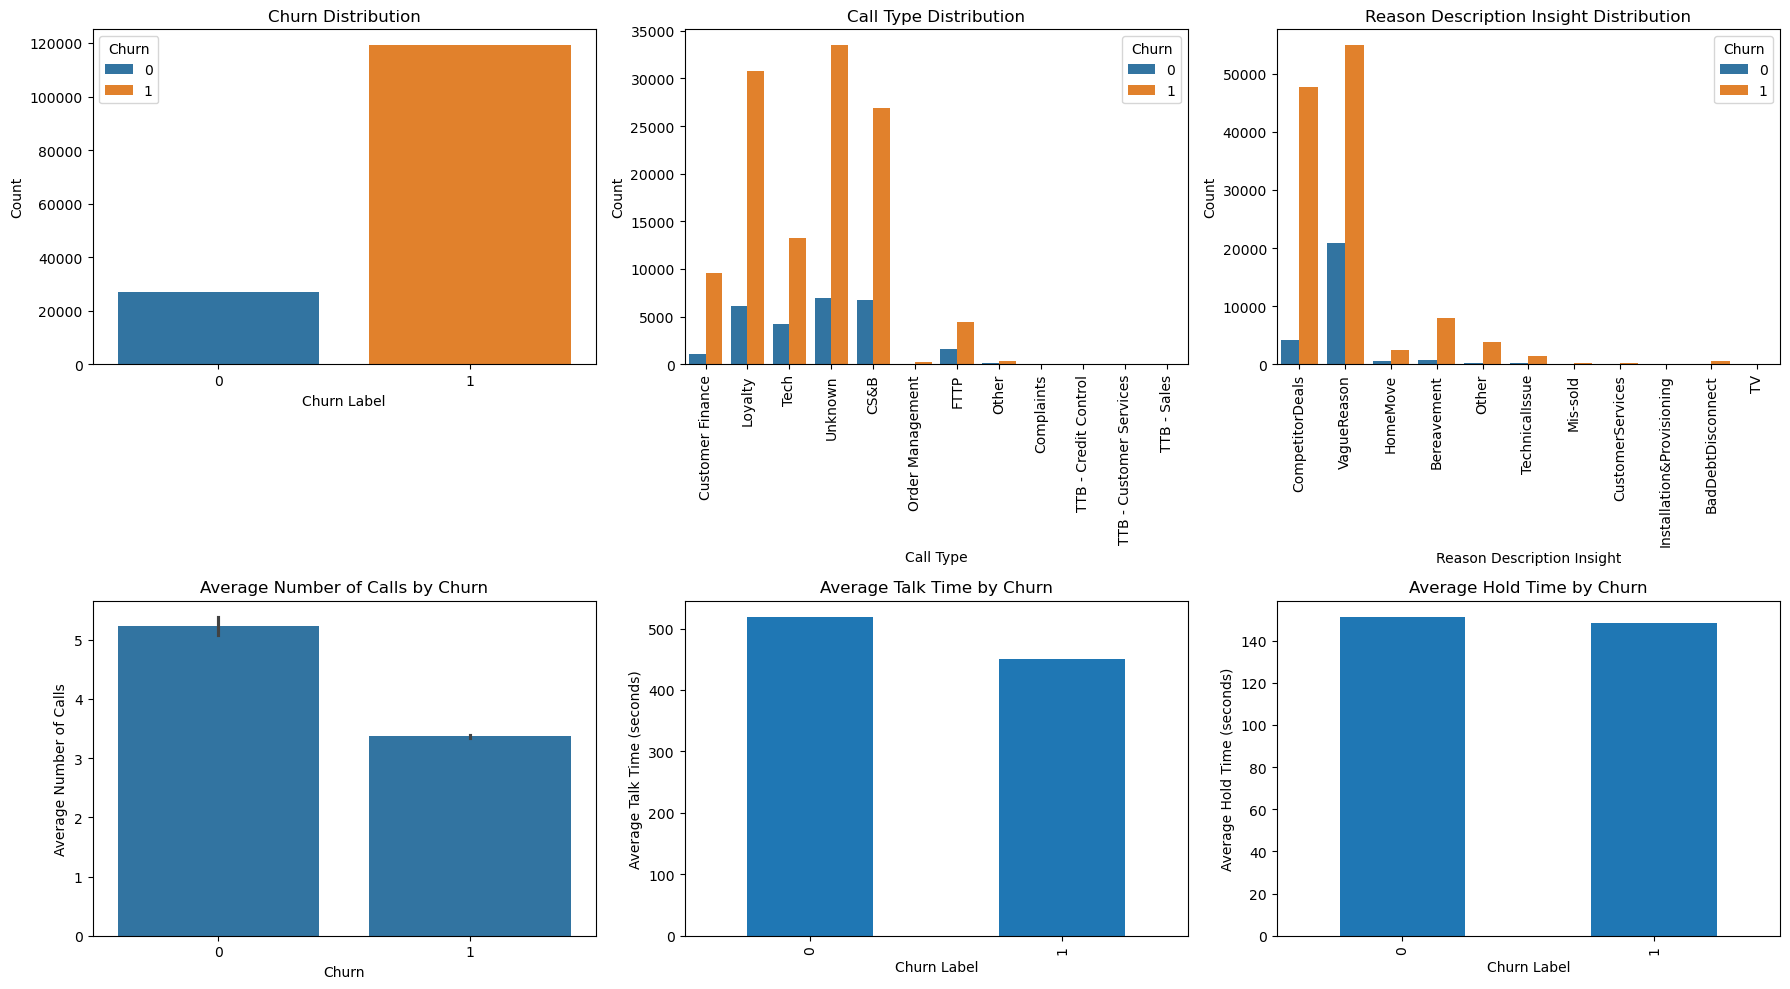

In [11]:
# Check data distribution based on 'churn', call_type, and reason_description_insights
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Churn distribution
sns.countplot(x='Churn', hue='Churn', data=df, ax=axes[0,0])
axes[0,0].set_title('Churn Distribution')
axes[0,0].set_xlabel('Churn Label')
axes[0,0].set_ylabel('Count')

# Call type distribution
sns.countplot(x='call_type', hue='Churn', data=df, ax=axes[0,1])
axes[0,1].set_title('Call Type Distribution')
axes[0,1].set_xlabel('Call Type')
axes[0,1].set_ylabel('Count')
axes[0,1].tick_params(axis='x', rotation=90)  

# Reason description insight distribution
sns.countplot(x='reason_description_insight', hue='Churn', data=df, ax=axes[0,2])
axes[0,2].set_title('Reason Description Insight Distribution')
axes[0,2].set_xlabel('Reason Description Insight')
axes[0,2].set_ylabel('Count')
axes[0,2].tick_params(axis='x', rotation=90)  

# Number of calls by churn
sns.barplot(x='Churn', y='num_calls', data=df, ax=axes[1,0])
axes[1,0].set_title('Average Number of Calls by Churn')
axes[1,0].set_xlabel('Churn')
axes[1,0].set_ylabel('Average Number of Calls')   

# Average talk time by churn
df.groupby('Churn')['avg_talk_time_seconds'].mean().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Average Talk Time by Churn')
axes[1,1].set_xlabel('Churn Label')
axes[1,1].set_ylabel('Average Talk Time (seconds)') 

# Average hold time by churn
df.groupby('Churn')['avg_hold_time_seconds'].mean().plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Average Hold Time by Churn')
axes[1,2].set_xlabel('Churn Label')
axes[1,2].set_ylabel('Average Hold Time (seconds)')

plt.tight_layout()
plt.show()

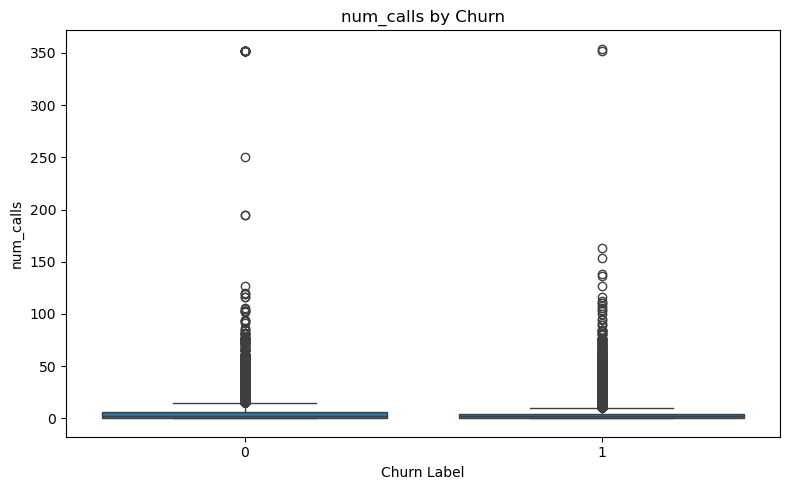

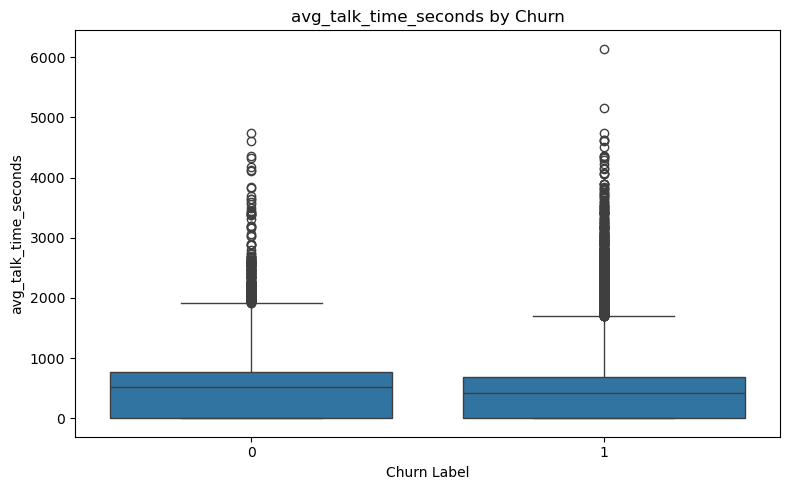

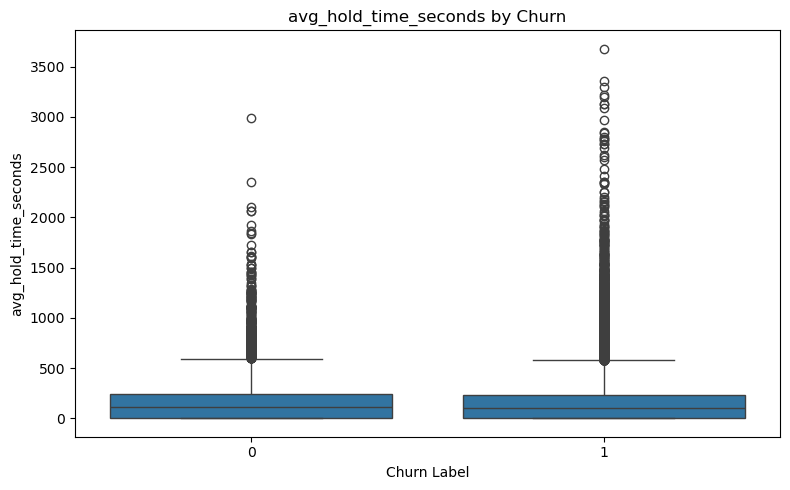

In [12]:
# Visualize correlation between numerical features and churn
numerical_features = ['num_calls', 'avg_talk_time_seconds', 'avg_hold_time_seconds']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.xlabel('Churn Label')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

In [13]:
# Encode categorical variables for correlation analysis
df_encoded = df.copy()
df_encoded['call_type_encoded'] = df_encoded['call_type'].astype('category').cat.codes
df_encoded['reason_description_insight_encoded'] = df_encoded['reason_description_insight'].astype('category').cat.codes

In [14]:
df.columns

Index(['unique_customer_identifier', 'cease_placed_date',
       'cease_completed_date', 'reason_description',
       'reason_description_insight', 'duration', 'Churn',
       'avg_talk_time_seconds', 'talk_time_seconds_std',
       'avg_hold_time_seconds', 'max_hold_time', 'std_hold_time', 'call_type',
       'num_calls'],
      dtype='object')

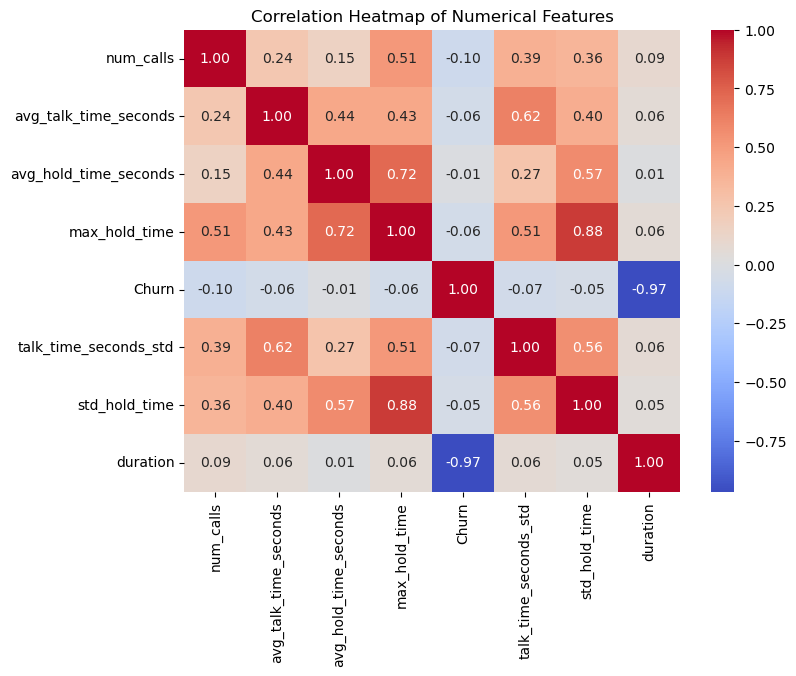

In [15]:
# Correlation heatmap for numerical features
numerical_cols = ['num_calls', 'avg_talk_time_seconds', 'avg_hold_time_seconds', 'max_hold_time', 'Churn', 'talk_time_seconds_std', 'std_hold_time', 'duration']
corr_matrix = df_encoded[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [16]:
# Use chi square test for categorical features
from scipy.stats import chi2_contingency
categorical_features = ['call_type', 'reason_description_insight']
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}:")
    print(f"Chi2 statistic: {chi2:.4f}, p-value: {p:.4f}\n")
    

Chi-square test for call_type:
Chi2 statistic: 1276.0018, p-value: 0.0000

Chi-square test for reason_description_insight:
Chi2 statistic: 8918.2927, p-value: 0.0000



null hypothesis: 
- p<0.05 = values are associated
- p>0.05 = values are not associated

In [17]:
# Mutual info classification for feature importance
from sklearn.feature_selection import mutual_info_classif, SelectKBest

X = df_encoded.drop(columns=['Churn', 'unique_customer_identifier', 'cease_placed_date', 'cease_completed_date', 'reason_description', 'reason_description_insight', 'call_type'])
y = df_encoded['Churn']
selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': selector.scores_}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                              Feature  Importance
0                            duration    0.474401
8  reason_description_insight_encoded    0.043657
7                   call_type_encoded    0.009020
6                           num_calls    0.007649
1               avg_talk_time_seconds    0.004884
2               talk_time_seconds_std    0.003266
4                       max_hold_time    0.002604
3               avg_hold_time_seconds    0.001970
5                       std_hold_time    0.000782


In [18]:
df_encoded.columns

Index(['unique_customer_identifier', 'cease_placed_date',
       'cease_completed_date', 'reason_description',
       'reason_description_insight', 'duration', 'Churn',
       'avg_talk_time_seconds', 'talk_time_seconds_std',
       'avg_hold_time_seconds', 'max_hold_time', 'std_hold_time', 'call_type',
       'num_calls', 'call_type_encoded', 'reason_description_insight_encoded'],
      dtype='object')

In [19]:
# Feature Engineering: Create new features based on domain knowledge
df_encoded['total_talk_time'] = df_encoded['avg_talk_time_seconds'] * df_encoded['num_calls']
df_encoded['total_hold_time'] = df_encoded['avg_hold_time_seconds'] * df_encoded['num_calls']
df_encoded['hold_ratio'] = df_encoded['avg_hold_time_seconds'] / (df_encoded['avg_talk_time_seconds'] + 1e-6) 
df_encoded['hold_severity'] = df_encoded['max_hold_time'] / (df_encoded['avg_hold_time_seconds'] + 1e-6)
df_encoded['frustration_score'] = (df_encoded['avg_hold_time_seconds'] * df_encoded['num_calls']) / (df_encoded['avg_talk_time_seconds'] + 1e-6)
df_encoded['engagement_score'] = df_encoded['total_talk_time'] / (df_encoded['duration']+ 1e-6)

In [20]:
# Mutual info classification for feature importance
from sklearn.feature_selection import mutual_info_classif, SelectKBest

X = df_encoded.drop(columns=['Churn', 'unique_customer_identifier', 'cease_placed_date', 'cease_completed_date', 'reason_description', 'reason_description_insight', 'call_type'])
y = df_encoded['Churn']
selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X, y)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': selector.scores_}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                               Feature  Importance
0                             duration    0.474419
14                    engagement_score    0.246250
8   reason_description_insight_encoded    0.042929
9                      total_talk_time    0.009627
7                    call_type_encoded    0.007840
6                            num_calls    0.007223
1                avg_talk_time_seconds    0.005640
10                     total_hold_time    0.004949
12                       hold_severity    0.004385
2                talk_time_seconds_std    0.003661
4                        max_hold_time    0.003154
3                avg_hold_time_seconds    0.002553
11                          hold_ratio    0.001008
13                   frustration_score    0.000415
5                        std_hold_time    0.000311


In [21]:
df_encoded

,unique_customer_identifier,cease_placed_date,cease_completed_date,reason_description,reason_description_insight,duration,Churn,avg_talk_time_seconds,talk_time_seconds_std,avg_hold_time_seconds,...,call_type,num_calls,call_type_encoded,reason_description_insight_encoded,total_talk_time,total_hold_time,hold_ratio,hold_severity,frustration_score,engagement_score
0,03b1c584533a86d067dd51bbca242db2b55b692f10d325...,2023-08-03,2023-09-04,Competitor Deals - No longer required,CompetitorDeals,32.0,1,636.571429,367.898019,82.285714,...,Customer Finance,7.0,2,2,4456.0,576.0,0.129264,4.034722,0.904847,139.249996
1,97a7bdce317de91a32636e6675bbb2e5b25573308ef7bb...,2023-08-03,2023-09-04,Cease,VagueReason,32.0,1,1438.000000,0.000000,654.000000,...,Loyalty,1.0,4,10,1438.0,654.0,0.454798,1.000000,0.454798,44.937499
2,c5049a1aedc36d7d7379c2c2144972b099521e6614cf8c...,2023-08-03,2023-09-05,Competitor Deals - No longer required,CompetitorDeals,33.0,1,775.750000,608.035292,159.000000,...,Tech,4.0,10,2,3103.0,636.0,0.204963,3.119497,0.819852,94.030300
3,cffa7eecb1708776f425a0f1e70598710b5e74a66d8fea...,2023-08-03,2023-08-21,Not Known,VagueReason,18.0,1,585.000000,314.241945,50.333333,...,Loyalty,3.0,4,10,1755.0,151.0,0.086040,3.000000,0.258120,97.499995
4,f450c8a916d400b204b0228fa23bf613ceae5727e08a68...,2023-08-03,2023-09-04,Competitor Deals - No longer required,CompetitorDeals,32.0,1,409.000000,35.355339,226.500000,...,Loyalty,2.0,4,2,818.0,453.0,0.553790,1.240618,1.107579,25.562499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146008,a268c56536b409e6e4249cac2ff2950a297842b8424f89...,2024-06-29,2024-08-07,Competitor Deals - Better Broadband Deal,CompetitorDeals,39.0,1,384.000000,0.000000,0.000000,...,Loyalty,1.0,4,2,384.0,0.0,0.000000,0.000000,0.000000,9.846154
146009,bce729de2730a950d3aa413bb9f8e138946c1915e6f6bb...,2024-06-29,2024-07-11,Competitor Deals - No longer required,CompetitorDeals,12.0,1,268.500000,299.106168,117.500000,...,Loyalty,2.0,4,2,537.0,235.0,0.437616,2.000000,0.875233,44.749996
146010,3cc776e2d422c1102d9a57a40a5f47c9c6dff9dab0b659...,2024-06-29,NaN,Competitor Deals - No longer required,CompetitorDeals,596.0,0,599.166667,717.885890,238.083333,...,CS&B,12.0,0,2,7190.0,2857.0,0.397357,3.309765,4.768289,12.063758
146011,50e3fe7af5f1f517c8982870280048c69062d833324bc9...,2024-06-29,NaN,Not Known,VagueReason,596.0,0,657.578947,556.938588,239.473684,...,FTTP,19.0,3,10,12494.0,4550.0,0.364175,5.758462,6.919321,20.963087


In [22]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.select_dtypes(include='number').drop(columns=['Churn'])  
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data) 

                               feature        VIF
0                             duration   1.419654
1                avg_talk_time_seconds   4.464799
2                talk_time_seconds_std   4.182824
3                avg_hold_time_seconds   6.659834
4                        max_hold_time  30.239769
5                        std_hold_time   8.944507
6                            num_calls  52.391670
7                    call_type_encoded   2.298346
8   reason_description_insight_encoded   3.384673
9                      total_talk_time  40.361088
10                     total_hold_time  59.181847
11                          hold_ratio   8.807706
12                       hold_severity  10.755055
13                   frustration_score  54.187148
14                    engagement_score   1.448652


In [23]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
X = df_encoded.select_dtypes(include='number').drop(columns=['Churn','num_calls', 'total_talk_time', 'total_hold_time', 'max_hold_time', 'engagement_score', 'duration'])  
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data) 

                              feature       VIF
0               avg_talk_time_seconds  3.975518
1               talk_time_seconds_std  3.655166
2               avg_hold_time_seconds  3.078818
3                       std_hold_time  3.681577
4                   call_type_encoded  2.259431
5  reason_description_insight_encoded  3.038914
6                          hold_ratio  1.473135
7                       hold_severity  3.698471
8                   frustration_score  2.113042


In [24]:
# Split data into training and testing sets
X = df_encoded.drop(columns=['Churn', 'cease_completed_date', 'cease_placed_date', 'unique_customer_identifier', 'call_type', 'reason_description_insight', 'reason_description', 'duration',
                             'num_calls', 'total_talk_time', 'total_hold_time', 'max_hold_time', 'engagement_score', 'duration'])
y = df_encoded['Churn']

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.7, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

In [25]:
# Normalize data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_val = ss.transform(X_val)

**Feature Selection Using Mutual Info Classif**

/var/folders/x2/xzn0478s38vfcsjrc5rzqfyr0000gn/T/ipykernel_57756/2428509122.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_scores.head(n_features),


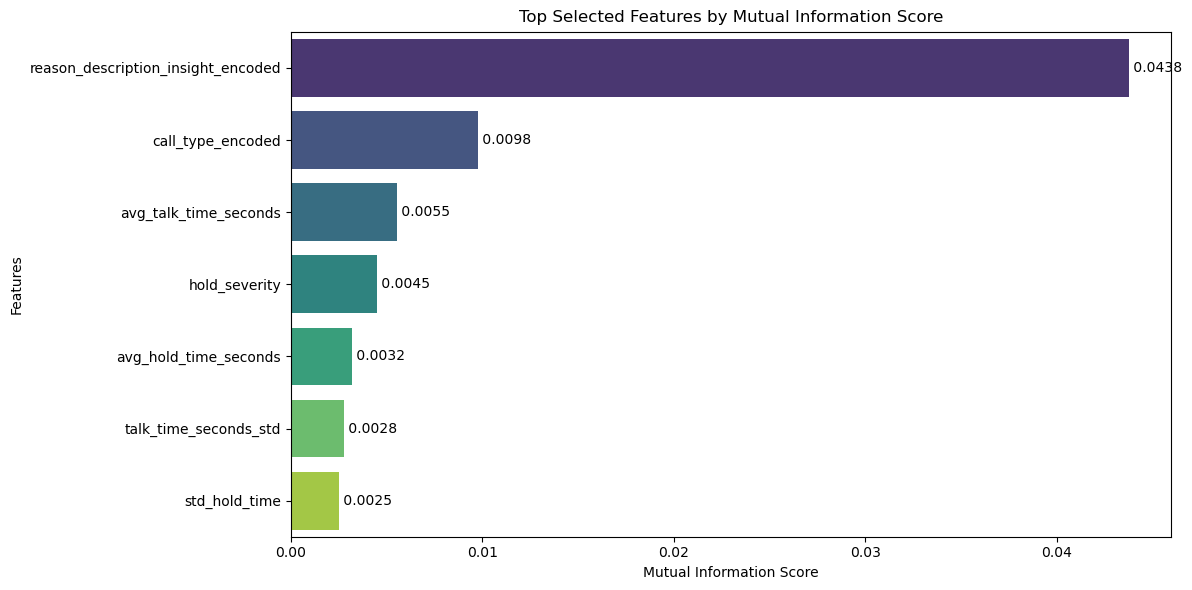

In [26]:
def select_features(X, y, n_features):
    selector = SelectKBest(score_func=mutual_info_classif, k=n_features)
    X_selected = selector.fit_transform(X, y)
    
    # Get selected feature names
    selected_features = X.columns[selector.get_support()].tolist()
    
    # Get scores for selected features
    feature_scores = pd.DataFrame({
        'Feature': X.columns,
        'Score': selector.scores_
    })
    feature_scores = feature_scores.sort_values('Score', ascending=False)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot feature importance scores
    sns.barplot(data=feature_scores.head(n_features), 
                x='Score', 
                y='Feature',
                palette='viridis')
    
    plt.title('Top Selected Features by Mutual Information Score', pad=7)
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Features')
    
    # Add score values on bars
    for i, v in enumerate(feature_scores.head(n_features)['Score']):
        plt.text(v, i, f' {v:.4f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    return X_selected, selected_features, feature_scores

X_selected, selected_features, feature_scores = select_features(X, y, 7)

##### **MODELS:**
- Logistic Regression
- Decision Tree Classifier
- XGBoost 

##### **Metrics**
- Accuracy Score
- Precision Score
- Recall Score
- F1 Score

In [27]:
def evaluate(X, y, model, subset=''):

    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)     
    rec = recall_score(y, y_pred)          
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)

    print(f"\nEvaluation Metrics for {subset}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (Churn): {prec:.4f}")
    print(f"Recall (Churn): {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {subset}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {subset}')
    plt.legend()
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_).flatten()
    else:
        importances = None

    if importances is not None:
        feature_names = X.columns if isinstance(X, pd.DataFrame) \
                        else [f'Feature_{i}' for i in range(X.shape[1])]

        feat_imp = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        sns.barplot(data=feat_imp.head(10), x='Importance', y='Feature')
        plt.title(f'Top 10 Feature Importance - {subset}')
        plt.show()

    print("\nClassification Report:\n",
          classification_report(y, y_pred,
                                target_names=['Not Churned', 'Churned']))

    return acc, prec, rec, f1, roc_auc

    # Cross-validation score
    def cross_validate(model, X, y, cv=5):
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        print(f"Cross-validation scores: {scores}")
        print(f"Mean accuracy: {scores.mean():.4f}")
        return scores.mean()


Evaluation Metrics for Training Set:
Accuracy: 0.5683
Precision (Churn): 0.9181
Recall (Churn): 0.5169
F1 Score: 0.6614
ROC-AUC: 0.6996


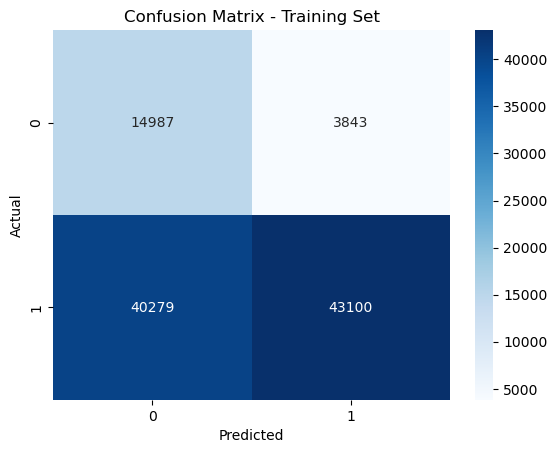

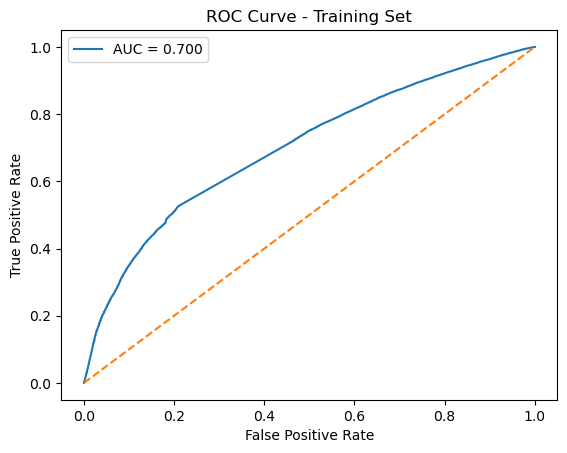

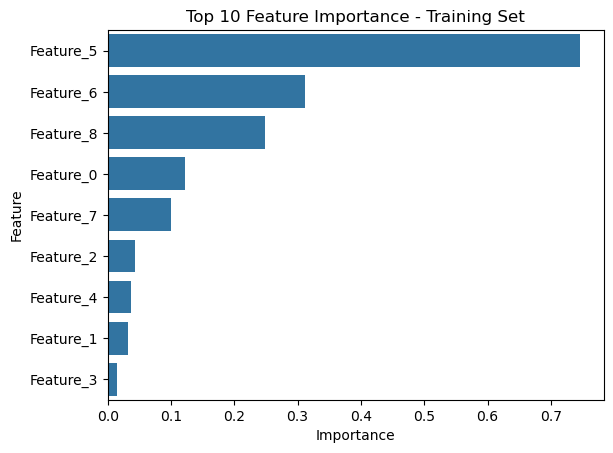


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.27      0.80      0.40     18830
     Churned       0.92      0.52      0.66     83379

    accuracy                           0.57    102209
   macro avg       0.59      0.66      0.53    102209
weighted avg       0.80      0.57      0.61    102209


Evaluation Metrics for Validation Set:
Accuracy: 0.5574
Precision (Churn): 0.9162
Recall (Churn): 0.5076
F1 Score: 0.6533
ROC-AUC: 0.6896


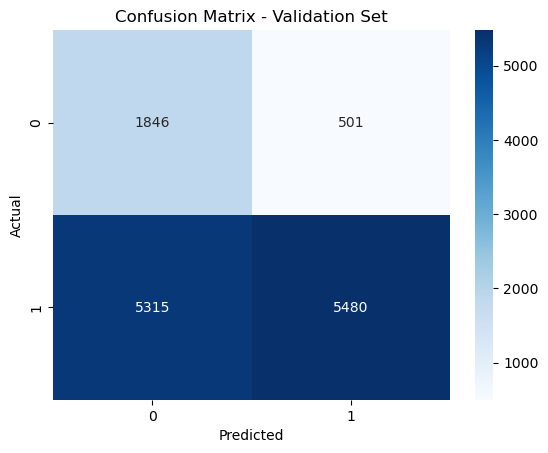

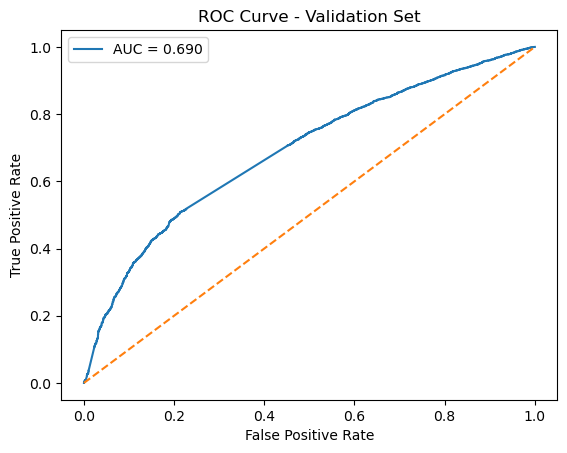

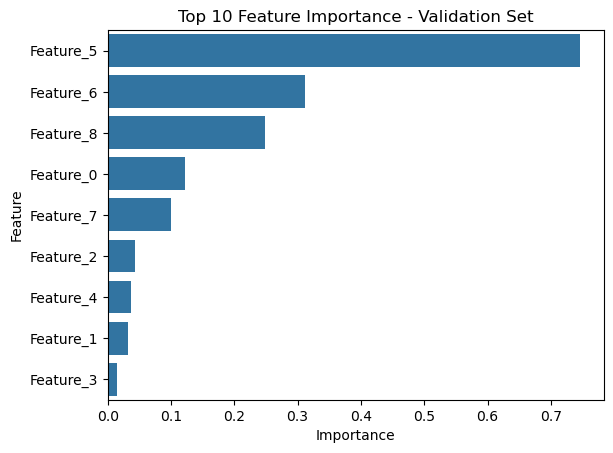


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.26      0.79      0.39      2347
     Churned       0.92      0.51      0.65     10795

    accuracy                           0.56     13142
   macro avg       0.59      0.65      0.52     13142
weighted avg       0.80      0.56      0.61     13142



(0.5574493988738396,
 0.9162347433539542,
 0.50764242704956,
 0.6533142584644731,
 0.6895950661246419)

In [28]:
# Build Logistic Regression model
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

# Evaluate the model on training, validation, and test sets
evaluate(X_train, y_train, lr, subset='Training Set')
evaluate(X_val, y_val, lr, subset='Validation Set')


Evaluation Metrics for Training Set:
Accuracy: 0.8237
Precision (Churn): 0.9936
Recall (Churn): 0.7890
F1 Score: 0.8796
ROC-AUC: 0.9573


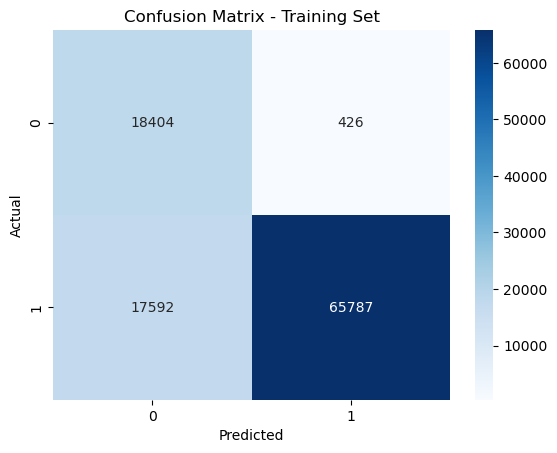

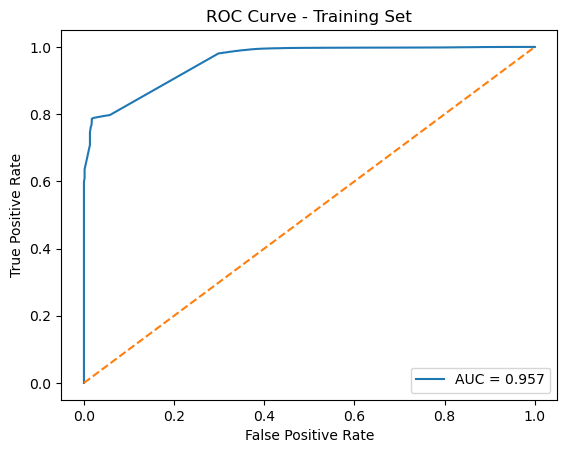

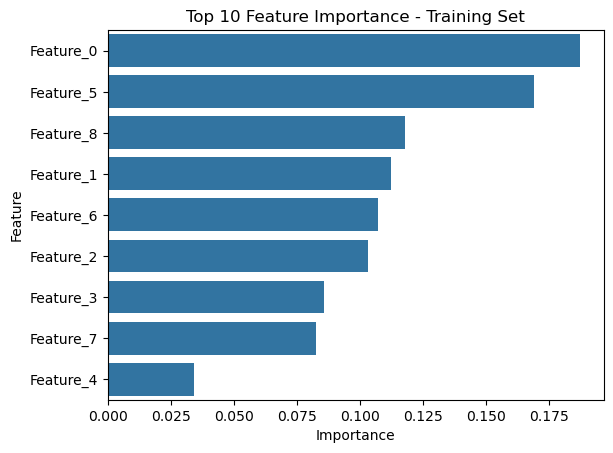


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.51      0.98      0.67     18830
     Churned       0.99      0.79      0.88     83379

    accuracy                           0.82    102209
   macro avg       0.75      0.88      0.78    102209
weighted avg       0.90      0.82      0.84    102209


Evaluation Metrics for Validation Set:
Accuracy: 0.6908
Precision (Churn): 0.8464
Recall (Churn): 0.7619
F1 Score: 0.8019
ROC-AUC: 0.6268


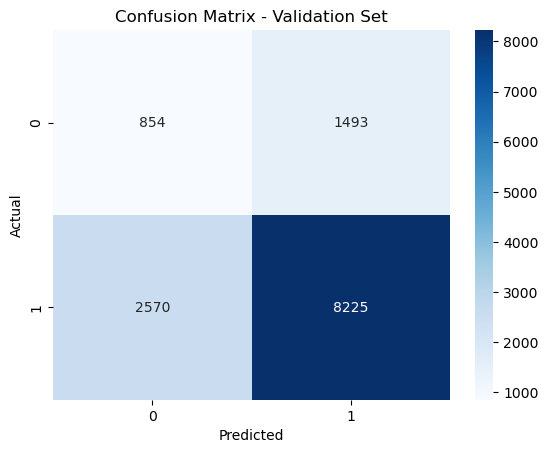

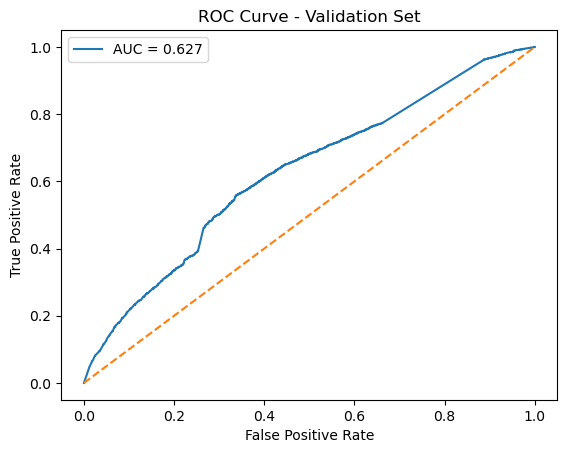

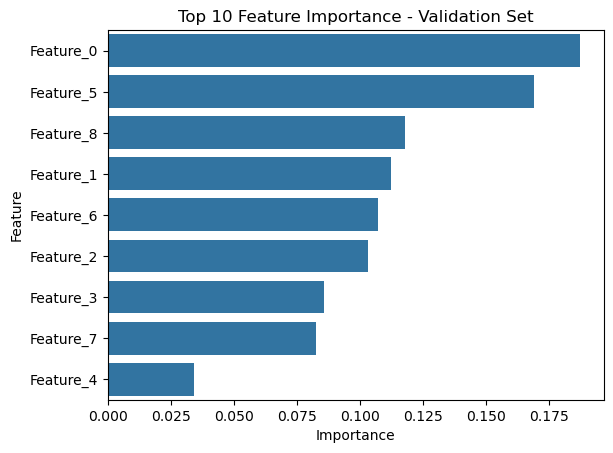


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.25      0.36      0.30      2347
     Churned       0.85      0.76      0.80     10795

    accuracy                           0.69     13142
   macro avg       0.55      0.56      0.55     13142
weighted avg       0.74      0.69      0.71     13142



(0.690838532947801,
 0.8463675653426631,
 0.761926817971283,
 0.8019304831082728,
 0.6267807907880785)

In [ ]:
# Build Random Forest model
rf = RandomForestClassifier(n_estimators=200, max_depth=None, class_weight='balanced', random_state=42, n_jobs=1)
rf.fit(X_train, y_train)

# Evaluate the model on training, validation, and test sets
evaluate(X_train, y_train, rf, subset='Training Set')
evaluate(X_val, y_val, rf, subset='Validation Set')

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:48:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Evaluation Metrics for Training Set:
Accuracy: 0.8320
Precision (Churn): 0.8319
Recall (Churn): 0.9951
F1 Score: 0.9062
ROC-AUC: 0.7922


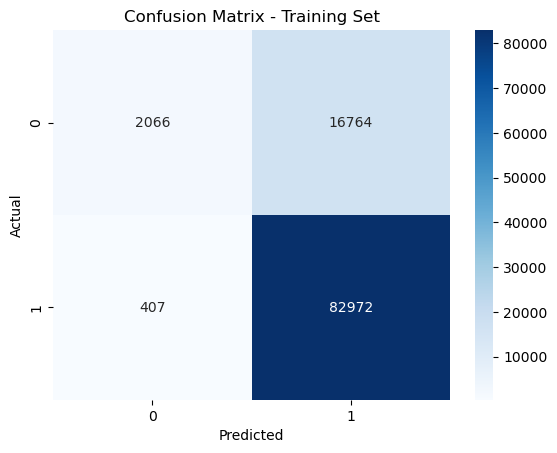

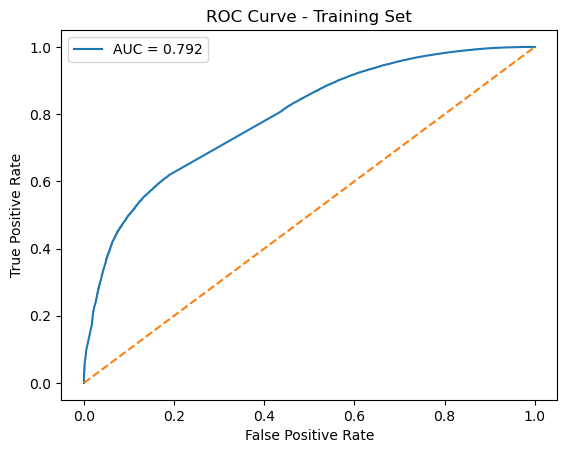

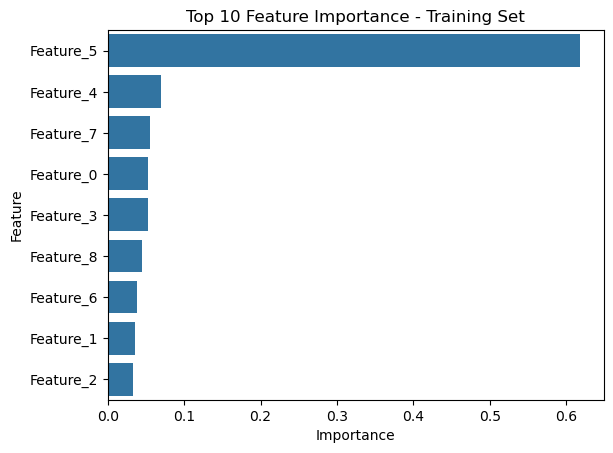


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.84      0.11      0.19     18830
     Churned       0.83      1.00      0.91     83379

    accuracy                           0.83    102209
   macro avg       0.83      0.55      0.55    102209
weighted avg       0.83      0.83      0.78    102209


Evaluation Metrics for Validation Set:
Accuracy: 0.8168
Precision (Churn): 0.8270
Recall (Churn): 0.9826
F1 Score: 0.8981
ROC-AUC: 0.6938


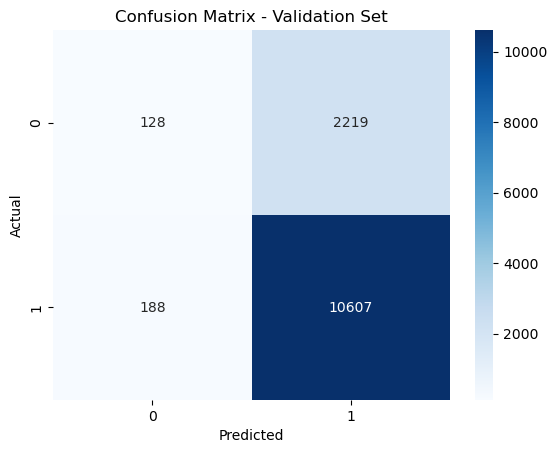

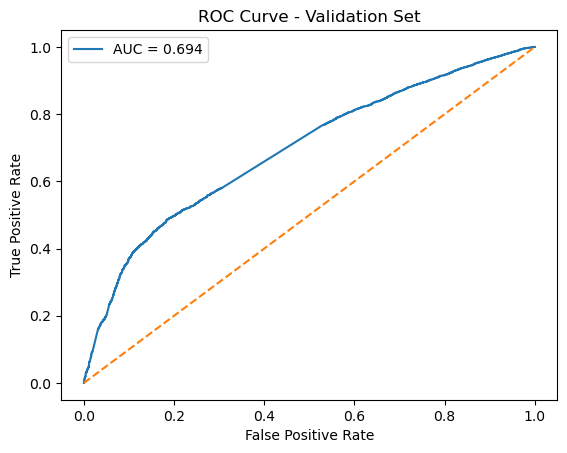

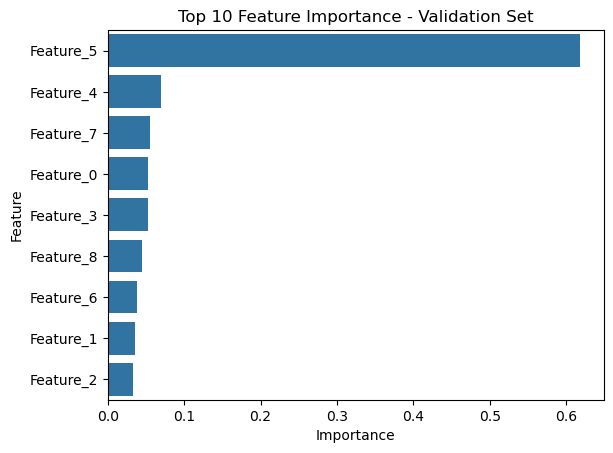


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.41      0.05      0.10      2347
     Churned       0.83      0.98      0.90     10795

    accuracy                           0.82     13142
   macro avg       0.62      0.52      0.50     13142
weighted avg       0.75      0.82      0.75     13142



(0.8168467508750571,
 0.8269920474037112,
 0.982584529874942,
 0.8980991490622751,
 0.6937534400345122)

In [30]:
# Build XGBoost model
xgb = XGBClassifier(class_weight='balanced', use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)   

# Evaluate the model on training, validation, and test sets
evaluate(X_train, y_train, xgb, subset='Training Set')
evaluate(X_val, y_val, xgb, subset='Validation Set')

In [31]:
# Hyperparameter tuning for Models
skfold_scores = StratifiedKFold(n_splits = 6, shuffle=True, random_state=42)
scores1 = cross_val_score(lr, X, y, cv=skfold_scores, scoring='recall')
print(f"Cross-validation scores for Logistic Regression: {scores1}")
scores2 = cross_val_score(rf, X, y, cv=skfold_scores, scoring='recall')
print(f"Cross-validation scores for Randon Forest: {scores2}")
scores3 = cross_val_score(xgb, X, y, cv=skfold_scores, scoring='recall')
print(f"Cross-validation scores for XGBoost: {scores3}")

Cross-validation scores for Logistic Regression: [0.50919071 0.51515915 0.51002216 0.51928888 0.51566277 0.51581386]
Cross-validation scores for Randon Forest: [0.76250189 0.76304392 0.75669823 0.76702256 0.76183521 0.75836019]


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_

Cross-validation scores for XGBoost: [0.98791358 0.98539484 0.98529412 0.98685536 0.98574738 0.98811442]


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [32]:
# Find best model using randomized search CV
# Parameter distribution
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, 3, 5, 10]  
}

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=40,
    cv=3,
    scoring='roc_auc',   
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit
random_search_xgb.fit(X_train, y_train)

# Best model
print("Best Parameters:", random_search_xgb.best_params_)
best_rs_model_xgb = random_search_xgb.best_estimator_

# Predictions
y_pred_xgb = best_rs_model_xgb.predict(X_test)
y_prob_xgb = best_rs_model_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, scale_pos_weight=3, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, scale_pos_weight=3, subsample=0.6; total time=   1.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, scale_pos_weight=3, subsample=0.6; total time=   1.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=500, scale_pos_weight=5, subsample=1.0; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=100, scale_pos_weight=3, subsample=0.8; total time=   1.4s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=500, scale_pos_weight=5, subsample=1.0; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.1, max_depth=7, min_child_weight=7, n_estimators=500, scale_pos_weight=5, subsample=1.0; total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=100, scale_pos_weight=3, subsample=0.8; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7, n_estimators=100, scale_pos_weight=3, subsample=0.8; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=0.8; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   1.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=500, scale_pos_weight=10, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=500, scale_pos_weight=10, subsample=0.8; total time=   7.3s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=500, scale_pos_weight=10, subsample=0.8; total time=   7.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   3.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   3.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   3.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=15, min_child_weight=7, n_estimators=200, scale_pos_weight=5, subsample=0.8; total time=   5.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, scale_pos_weight=5, subsample=0.6; total time=   8.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, scale_pos_weight=5, subsample=0.6; total time=   8.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, scale_pos_weight=5, subsample=0.6; total time=   8.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=15, min_child_weight=7, n_estimators=200, scale_pos_weight=5, subsample=0.8; total time=   5.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   2.6s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.05, max_depth=15, min_child_weight=7, n_estimators=200, scale_pos_weight=5, subsample=0.8; total time=   5.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=100, scale_pos_weight=3, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=100, scale_pos_weight=3, subsample=1.0; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   2.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=10, min_child_weight=7, n_estimators=100, scale_pos_weight=3, subsample=1.0; total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=15, min_child_weight=3, n_estimators=500, scale_pos_weight=5, subsample=1.0; total time=  19.6s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=15, min_child_weight=3, n_estimators=500, scale_pos_weight=5, subsample=1.0; total time=  19.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=15, min_child_weight=3, n_estimators=500, scale_pos_weight=5, subsample=1.0; total time=  19.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, scale_pos_weight=3, subsample=0.6; total time=   9.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=0.6; total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=0.6; total time=   2.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, scale_pos_weight=10, subsample=0.6; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=300, scale_pos_weight=5, subsample=0.8; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, scale_pos_weight=3, subsample=0.6; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, scale_pos_weight=3, subsample=0.6; total time=   9.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=300, scale_pos_weight=5, subsample=0.8; total time=   2.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   5.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=300, scale_pos_weight=5, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=100, scale_pos_weight=1, subsample=0.8; total time=   5.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.6; total time=   0.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.6; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, scale_pos_weight=1, subsample=0.6; total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=500, scale_pos_weight=5, subsample=0.8; total time=   2.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=500, scale_pos_weight=5, subsample=0.8; total time=   2.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=7, n_estimators=500, scale_pos_weight=5, subsample=0.8; total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, scale_pos_weight=1, subsample=0.6; total time=   3.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=500, scale_pos_weight=3, subsample=1.0; total time=   5.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=500, scale_pos_weight=3, subsample=1.0; total time=   5.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=500, scale_pos_weight=3, subsample=1.0; total time=   5.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, scale_pos_weight=1, subsample=0.6; total time=   2.6s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, scale_pos_weight=1, subsample=0.6; total time=   2.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=100, scale_pos_weight=10, subsample=0.8; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=500, scale_pos_weight=1, subsample=0.8; total time=   9.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=0.6; total time=   6.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=500, scale_pos_weight=1, subsample=0.8; total time=  10.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=500, scale_pos_weight=1, subsample=0.8; total time=  10.4s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=0.6; total time=   6.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   1.9s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=1, subsample=1.0; total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=200, scale_pos_weight=5, subsample=1.0; total time=  13.8s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=500, scale_pos_weight=10, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=300, scale_pos_weight=1, subsample=0.6; total time=   5.9s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=200, scale_pos_weight=5, subsample=1.0; total time=  14.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=200, scale_pos_weight=5, subsample=1.0; total time=  14.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=500, scale_pos_weight=10, subsample=1.0; total time=   1.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=500, scale_pos_weight=10, subsample=1.0; total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=5, subsample=0.6; total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=500, scale_pos_weight=10, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=5, subsample=0.6; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=300, scale_pos_weight=5, subsample=0.6; total time=   4.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=500, scale_pos_weight=10, subsample=0.6; total time=   2.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=   3.1s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=   2.9s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=7, n_estimators=500, scale_pos_weight=10, subsample=0.6; total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=100, scale_pos_weight=10, subsample=1.0; total time=   3.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   1.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   2.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=1, subsample=0.8; total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=5, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   4.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=5, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=200, scale_pos_weight=5, subsample=0.8; total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   4.2s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=200, scale_pos_weight=1, subsample=1.0; total time=   4.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=100, scale_pos_weight=3, subsample=0.8; total time=   1.6s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=100, scale_pos_weight=3, subsample=0.8; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=15, min_child_weight=7, n_estimators=300, scale_pos_weight=3, subsample=0.6; total time=   7.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=15, min_child_weight=7, n_estimators=300, scale_pos_weight=3, subsample=0.6; total time=   7.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=15, min_child_weight=7, n_estimators=300, scale_pos_weight=3, subsample=0.6; total time=   7.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=200, scale_pos_weight=5, subsample=0.6; total time=   5.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, scale_pos_weight=1, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=200, scale_pos_weight=5, subsample=0.6; total time=   5.3s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=100, scale_pos_weight=3, subsample=0.8; total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=200, scale_pos_weight=5, subsample=0.6; total time=   5.5s


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=500, scale_pos_weight=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=500, scale_pos_weight=1, subsample=1.0; total time=   1.6s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, scale_pos_weight=5, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=500, scale_pos_weight=1, subsample=1.0; total time=   1.6s
[CV] EN

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [06:53:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}

Accuracy: 0.8142326006131367

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.02      0.03      5699
           1       0.82      1.00      0.90     24963

    accuracy                           0.81     30662
   macro avg       0.66      0.51      0.46     30662
weighted avg       0.76      0.81      0.74     30662

ROC-AUC Score: 0.7142015383680288


In [33]:
# Parameter distribution
param_dist_lr = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Randomized Search
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=param_dist_lr,
    n_iter=30,
    cv=5,
    scoring='roc_auc',   
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit
random_search_lr.fit(X_train, y_train)

# Best model
print("Best Parameters:", random_search_lr.best_params_)
best_rs_lr_model = random_search_lr.best_estimator_

# Predictions
y_pred_lr = best_rs_lr_model.predict(X_test)
y_prob_lr = best_rs_lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END C=29.763514416313132, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=29.763514416313132, class_weight=balanced, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=1438.44988828766, class_weight=balanced, penalty=l1, solver=saga; total time=   2.4s
[CV] END C=29.763514416313132, class_weight=None, penalty=l1, solver=saga; total time=   3.7s
[CV] END C=1438.44988828766, class_weight=balanced, penalty=l1, solver=saga; total time=   6.4s
[CV] END C=1438.44988828766, class_weight=balanced, penalty=l1, solver=saga; total time=   6.5s
[CV] END C=1438.44988828766, class_weight

In [34]:
# Parameter distribution
param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'bootstrap': [True, False]
}

# Randomized Search
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,   
    n_iter=30,
    cv=5,
    scoring='roc_auc',                   
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit
random_search_rf.fit(X_train, y_train)

# Best model
print("Best Parameters:", random_search_rf.best_params_)
best_rs_rf_model = random_search_rf.best_estimator_

# Predictions
y_pred_rf = best_rs_rf_model.predict(X_test)
y_prob_rf = best_rs_rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time= 4.3min
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time= 4.3min
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time= 4.3min
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time= 4.3min
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time= 4.4min
[CV] END bootstrap=True, class_weight=None, criterion=gini, max

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 6.4min
[CV] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 6.5min
[CV] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 6.3min
[CV] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time= 6.2min
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=20, n_estimators=100; total time= 1.2min
[CV] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=None, max_features=None, m

In [35]:
# Compare AUC scores of all models
print("Logistic AUC:", roc_auc_score(y_test, best_rs_lr_model.predict_proba(X_test)[:,1]))
print("Random Forest AUC:", roc_auc_score(y_test, best_rs_rf_model.predict_proba(X_test)[:,1]))
print("XGBoost AUC:", roc_auc_score(y_test, best_rs_model_xgb.predict_proba(X_test)[:,1]))

Logistic AUC: 0.6938155467811259
Random Forest AUC: 0.7095176804819052
XGBoost AUC: 0.7142015383680288



Evaluation Metrics for Test Set:
Accuracy: 0.8145
Precision (Churn): 0.8152
Recall (Churn): 0.9986
F1 Score: 0.8976
ROC-AUC: 0.7095


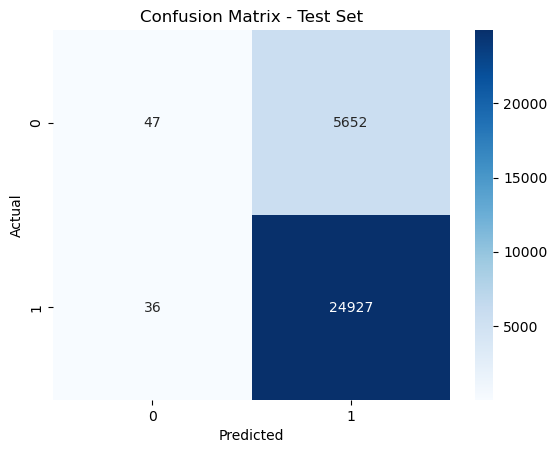

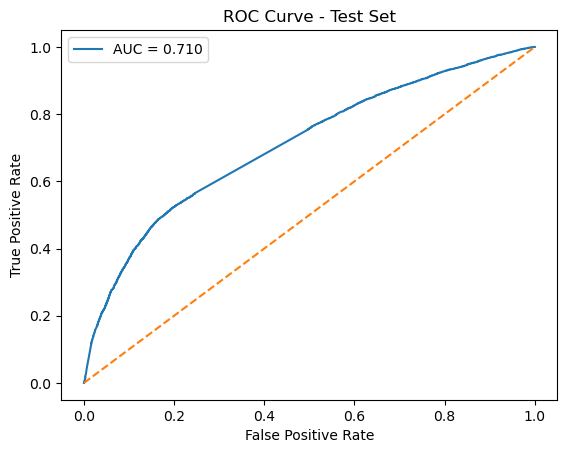

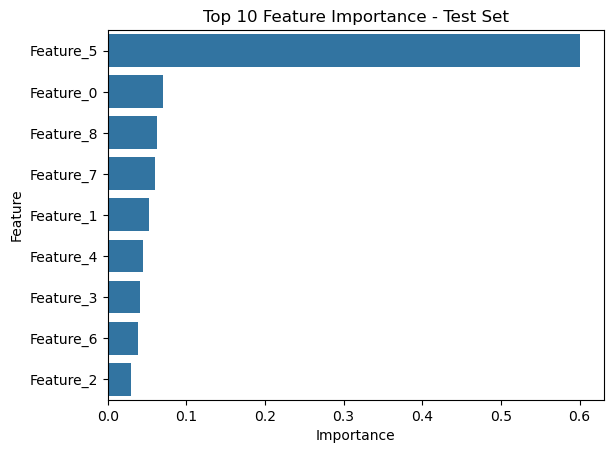


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.57      0.01      0.02      5699
     Churned       0.82      1.00      0.90     24963

    accuracy                           0.81     30662
   macro avg       0.69      0.50      0.46     30662
weighted avg       0.77      0.81      0.73     30662


Evaluation Metrics for Test Set:
Accuracy: 0.5629
Precision (Churn): 0.9157
Recall (Churn): 0.5101
F1 Score: 0.6552
ROC-AUC: 0.6938


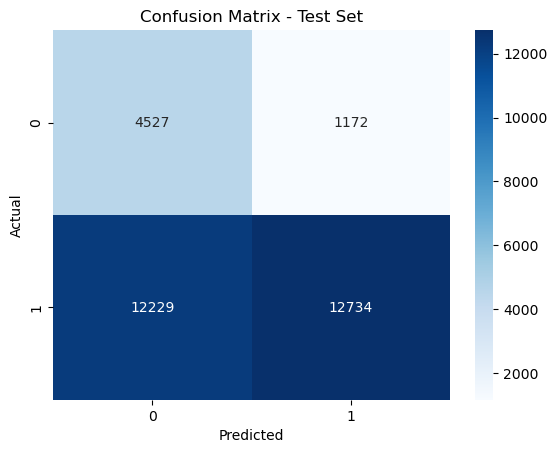

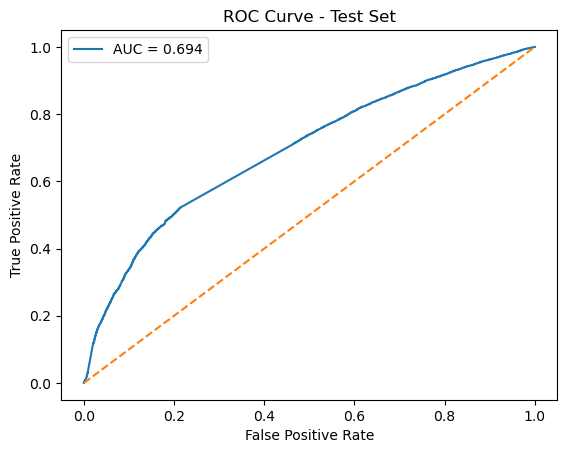

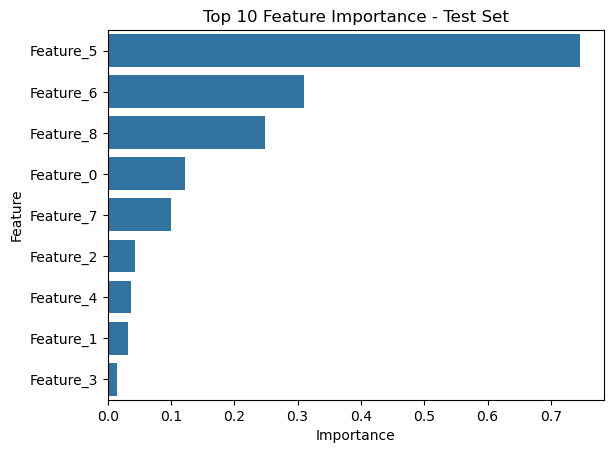


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.27      0.79      0.40      5699
     Churned       0.92      0.51      0.66     24963

    accuracy                           0.56     30662
   macro avg       0.59      0.65      0.53     30662
weighted avg       0.80      0.56      0.61     30662


Evaluation Metrics for Test Set:
Accuracy: 0.8142
Precision (Churn): 0.8159
Recall (Churn): 0.9966
F1 Score: 0.8973
ROC-AUC: 0.7142


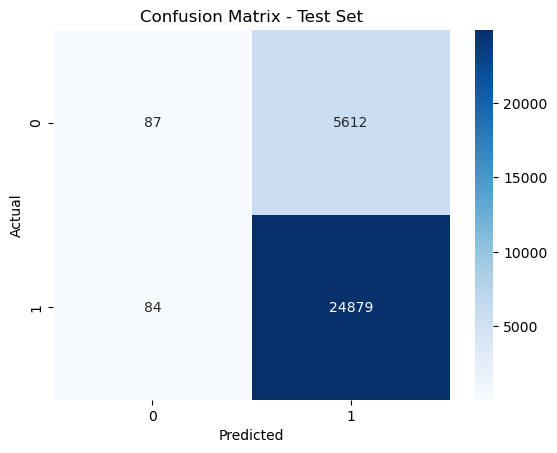

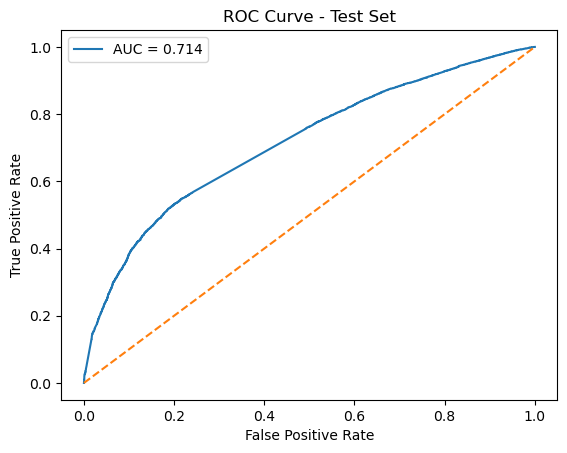

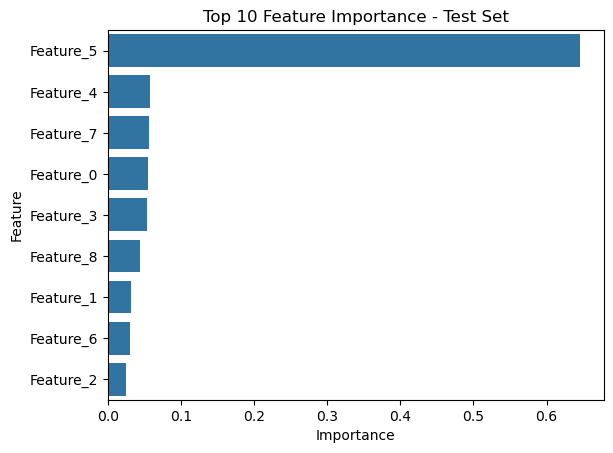


Classification Report:
               precision    recall  f1-score   support

 Not Churned       0.51      0.02      0.03      5699
     Churned       0.82      1.00      0.90     24963

    accuracy                           0.81     30662
   macro avg       0.66      0.51      0.46     30662
weighted avg       0.76      0.81      0.74     30662



(0.8142326006131367,
 0.8159456888918042,
 0.9966350198293474,
 0.897284235582645,
 0.7142015383680288)

In [36]:
# Run models again using best model
# Evaluate the random forest model on test set
evaluate(X_test, y_test, best_rs_rf_model, subset='Test Set')

# Evaluate the Logistic Regression model on test set
evaluate(X_test, y_test, best_rs_lr_model, subset='Test Set')

# Evaluate the XGBoost model on test set
evaluate(X_test, y_test, best_rs_model_xgb, subset='Test Set')

In [37]:
# Combine probabilities with actuals and IDs for further analysis
results_df = pd.DataFrame({
    'unique_customer_identifier': df_encoded.loc[y_test.index, 'unique_customer_identifier'],
    'actual_churn': y_test,
    'prob_churn_rf': y_prob_rf,
    'prob_churn_lr': y_prob_lr,
    'prob_churn_xgb': y_prob_xgb
})

/var/folders/x2/xzn0478s38vfcsjrc5rzqfyr0000gn/T/ipykernel_57756/2044949972.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_analysis = results_df.groupby('decile').agg(
/var/folders/x2/xzn0478s38vfcsjrc5rzqfyr0000gn/T/ipykernel_57756/2044949972.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='decile', y='lift', data=decile_analysis, palette='viridis')


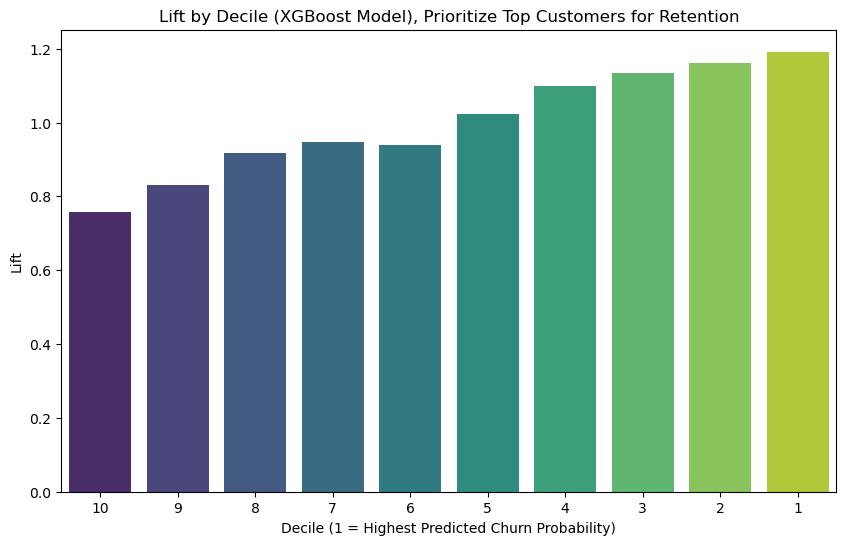

In [38]:
# Rank customers by predicted churn probability using XGBoost model
results_df = results_df.sort_values(by='prob_churn_xgb', ascending=False).reset_index(drop=True)

# Create deciles based on predicted probabilities
results_df['decile'] = pd.qcut(results_df['prob_churn_xgb'].rank(method='first'), 10, labels=range(10, 0, -1))

# Calculate lift and response rates by decile
decile_analysis = results_df.groupby('decile').agg(
    total_customers=('unique_customer_identifier', 'count'),
    actual_churns=('actual_churn', 'sum')
).reset_index()

decile_analysis['churn_rate'] = decile_analysis['actual_churns'] / decile_analysis['total_customers']
avg_churn_rate = results_df['actual_churn'].mean()
decile_analysis['lift'] = decile_analysis['churn_rate'] / avg_churn_rate

decile_analysis = decile_analysis.sort_values(by='decile', ascending=False)

# Visualize lift by decile
plt.figure(figsize=(10, 6))
sns.barplot(x='decile', y='lift', data=decile_analysis, palette='viridis')
plt.title('Lift by Decile (XGBoost Model), Prioritize Top Customers for Retention')
plt.xlabel('Decile (1 = Highest Predicted Churn Probability)')
plt.ylabel('Lift')
plt.show()

In [39]:
# Ensure data is sorted by Decile (1 to 10)
decile_analysis = decile_analysis.sort_values('decile')

# 1. Calculate Cumulative Churns
decile_analysis['cum_churns'] = decile_analysis['actual_churns'].cumsum()

# 2. Calculate Cumulative Gain (% of total churners captured)
total_actual_churns = decile_analysis['actual_churns'].sum()
decile_analysis['cum_gain_pct'] = (decile_analysis['cum_churns'] / total_actual_churns) * 100

# 3. Calculate Cumulative Lift
decile_analysis['cum_total_customers'] = decile_analysis['total_customers'].cumsum()
decile_analysis['cum_lift'] = (decile_analysis['cum_churns'] / decile_analysis['cum_total_customers']) / avg_churn_rate

print(decile_analysis[['decile', 'cum_gain_pct', 'cum_lift']])

  decile  cum_gain_pct  cum_lift
0     10      7.579217  0.757724
1      9     15.883508  0.794098
2      8     25.061090  0.835333
3      7     34.527100  0.863163
4      6     43.916997  0.878340
5      5     54.160157  0.902679
6      4     65.140408  0.930595
7      3     76.477186  0.955988
8      2     88.078356  0.978677
9      1    100.000000  1.000000


In [41]:
df_encoded['reason_description_insight'].value_counts()

reason_description_insight
VagueReason                  75757
CompetitorDeals              51838
Bereavement                   8688
Other                         4079
HomeMove                      2965
TechnicalIssue                1586
BadDebtDisconnect              533
Mis-sold                       229
CustomerServices               220
Installation&Provisioning      116
TV                               2
Name: count, dtype: int64